<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INTRODUCTION" data-toc-modified-id="INTRODUCTION-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>INTRODUCTION</a></span></li><li><span><a href="#BAR-CHARTS" data-toc-modified-id="BAR-CHARTS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>BAR CHARTS</a></span><ul class="toc-item"><li><span><a href="#Import-and-Clean-the-Dataset" data-toc-modified-id="Import-and-Clean-the-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import and Clean the Dataset</a></span></li><li><span><a href="#Incidents-Where-Arrents-were-Made" data-toc-modified-id="Incidents-Where-Arrents-were-Made-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Incidents Where Arrents were Made</a></span><ul class="toc-item"><li><span><a href="#Numbers-of-Incidents" data-toc-modified-id="Numbers-of-Incidents-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Numbers of Incidents</a></span></li><li><span><a href="#Bar-chart:-numbers-of-incidents-by-types" data-toc-modified-id="Bar-chart:-numbers-of-incidents-by-types-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Bar chart: numbers of incidents by types</a></span></li><li><span><a href="#Top-10-types-of-incidents" data-toc-modified-id="Top-10-types-of-incidents-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Top 10 types of incidents</a></span></li><li><span><a href="#Bar-chart:-Top-10-types-of-incidents" data-toc-modified-id="Bar-chart:-Top-10-types-of-incidents-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Bar chart: Top 10 types of incidents</a></span></li></ul></li><li><span><a href="#Incidents-Where-Arrests-were-NOT-Made" data-toc-modified-id="Incidents-Where-Arrests-were-NOT-Made-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Incidents Where Arrests were NOT Made</a></span><ul class="toc-item"><li><span><a href="#Numbers-of-incidents" data-toc-modified-id="Numbers-of-incidents-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Numbers of incidents</a></span></li><li><span><a href="#Bar-chart:-numbers-of-incidents-by-types" data-toc-modified-id="Bar-chart:-numbers-of-incidents-by-types-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Bar chart: numbers of incidents by types</a></span></li><li><span><a href="#Top-10-types-of-incidents" data-toc-modified-id="Top-10-types-of-incidents-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Top 10 types of incidents</a></span></li><li><span><a href="#Bar-chart:-Top-10-types-of-incidents" data-toc-modified-id="Bar-chart:-Top-10-types-of-incidents-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Bar chart: Top 10 types of incidents</a></span></li></ul></li></ul></li></ul></div>

# INTRODUCTION

In this Notebook, bar charts that show the numbers of incidents reported in Chicago in 2020 were created. 

Dataset was obtained from Chicago Data Portal: 

https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2



# BAR CHARTS

## Import and Clean the Dataset

In [1]:
import numpy as np  
import pandas as pd 

In [2]:
df_incidents = pd.read_csv('Crimes 2020.csv')

df_incidents.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12016034,JD193556,1/1/2020 0:00,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,32.0,22.0,11,1160263.0,1912391.0,2020,3/26/2020 15:45,41.915306,-87.686639,"(41.915306069, -87.686639247)"
1,12220321,JD430436,1/1/2020 0:00,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,8.0,47.0,17,1184157.0,1844395.0,2020,12/19/2020 15:45,41.728192,-87.600985,"(41.728192429, -87.600985433)"
2,12013828,JD191019,1/1/2020 0:00,044XX S LAVERGNE AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,22.0,56.0,2,1143770.0,1874726.0,2020,3/28/2020 15:47,41.812274,-87.748177,"(41.81227369, -87.748176594)"
3,12019692,JD197444,1/1/2020 0:00,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,47.0,6.0,11,1164983.0,1921507.0,2020,4/1/2020 15:50,41.940222,-87.669039,"(41.940221932, -87.669039008)"
4,12036792,JD216459,1/1/2020 0:00,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,18.0,66.0,11,1157290.0,1856526.0,2020,4/29/2020 15:53,41.762067,-87.699077,"(41.762066981, -87.699077348)"


In [3]:
# Check how many incidents were reported in 2020

df_incidents.shape

(208866, 22)

In [4]:
# Any rows that do not have values in Latitude and Longnitude columns must be deleted in order to make a map in later analyses
# Replace empty values with NaN

df_incidents.replace("", np.nan, inplace = True)

In [5]:
# Count the number of NaNs in each column

df_incidents.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1112
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       9
Community Area             1
FBI Code                   0
X Coordinate            1341
Y Coordinate            1341
Year                       0
Updated On                 0
Latitude                1341
Longitude               1341
Location                1341
dtype: int64

In [6]:
# Drop rows that have NaN values in Latitude and Longitude columns 

df_incidents.dropna(subset=["Latitude", "Longitude"], axis=0, inplace=True)

df_incidents.reset_index(drop=True, inplace=True)

# Check the shape of the df 

df_incidents.shape

(207525, 22)

In [7]:
# Check the numbers of incidents by types 

df_incidents['Primary Type'].value_counts()

BATTERY                              41390
THEFT                                40042
CRIMINAL DAMAGE                      24651
ASSAULT                              18193
DECEPTIVE PRACTICE                   16319
OTHER OFFENSE                        12335
MOTOR VEHICLE THEFT                   9899
BURGLARY                              8686
WEAPONS VIOLATION                     8419
ROBBERY                               7861
NARCOTICS                             7259
CRIMINAL TRESPASS                     4149
OFFENSE INVOLVING CHILDREN            1846
PUBLIC PEACE VIOLATION                1264
CRIMINAL SEXUAL ASSAULT               1079
SEX OFFENSE                            908
HOMICIDE                               784
INTERFERENCE WITH PUBLIC OFFICER       653
ARSON                                  579
PROSTITUTION                           273
STALKING                               191
INTIMIDATION                           161
CONCEALED CARRY LICENSE VIOLATION      147
LIQUOR LAW 

## Incidents Where Arrents were Made

In [8]:
# Choose incidents where arrests were made

df_arrest = df_incidents.query('Arrest == True')
df_arrest.reset_index(inplace=True)
df_arrest.head()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,25,12069817,JD254448,1/1/2020 0:00,057XX S MARSHFIELD AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,True,...,16.0,67.0,08A,1166322.0,1866649.0,2020,6/24/2020 15:47,41.789658,-87.665686,"(41.789658285, -87.665685774)"
1,42,12118034,JD308225,1/1/2020 0:00,057XX W WAVELAND AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,OTHER (SPECIFY),True,...,36.0,15.0,17,1137458.0,1924022.0,2020,8/21/2020 15:51,41.947664,-87.770143,"(41.947664094, -87.770142819)"
2,83,11938113,JD100039,1/1/2020 0:05,056XX S CAMPBELL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,15.0,63.0,08B,1160665.0,1867237.0,2020,1/8/2020 15:49,41.791391,-87.686412,"(41.791390513, -87.686412149)"
3,84,11939170,JD100033,1/1/2020 0:05,090XX S MUSKEGON AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,10.0,46.0,08B,1196581.0,1845642.0,2020,7/24/2020 15:46,41.731315,-87.555433,"(41.731315227, -87.555433457)"
4,86,11939185,JD100012,1/1/2020 0:10,052XX W BLOOMINGDALE AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,...,37.0,25.0,08B,1140968.0,1911463.0,2020,1/8/2020 15:49,41.913137,-87.757551,"(41.913136893, -87.757550744)"


In [9]:
# There are 32,993 incidents where arrests were made 
# Note: Incidents that did not have latitude and longitude data are not included

df_arrest.shape

(32993, 23)

### Numbers of Incidents

In [10]:
# Check how many incidents were reported in each type, and display the results in descending order, and convert the results into Pandas df

df_arrest_counts = pd.DataFrame(df_arrest['Primary Type'].value_counts())

df_arrest_counts= df_arrest_counts.reset_index()

df_arrest_counts.columns = ['Types','Counts']

df_arrest_counts

,Types,Counts
0,NARCOTICS,7256
1,BATTERY,6734
2,WEAPONS VIOLATION,5430
3,THEFT,2749
4,ASSAULT,2294
5,OTHER OFFENSE,1737
6,CRIMINAL TRESPASS,1706
7,CRIMINAL DAMAGE,1166
8,INTERFERENCE WITH PUBLIC OFFICER,600
9,ROBBERY,485


### Bar chart: numbers of incidents by types

In [11]:
# Make bar charts

import matplotlib.pyplot as plt

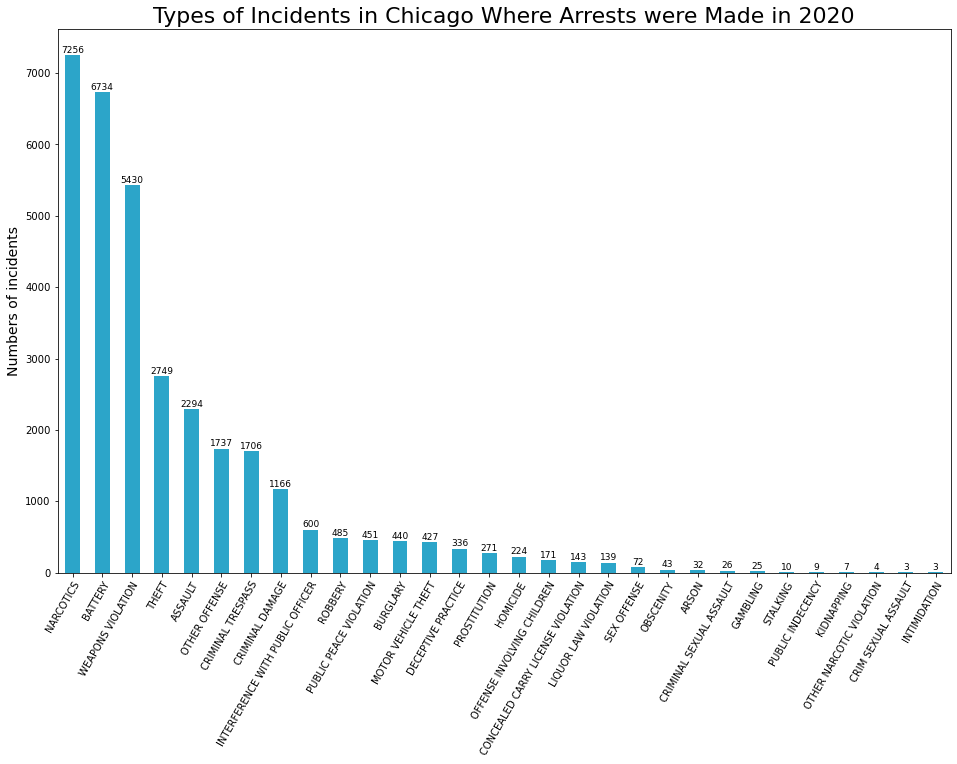

In [12]:
types = df_arrest_counts['Types']

ax = df_arrest_counts.plot(kind='bar', figsize=(16, 10), legend=None, color='#2ca5c9')


ax.set_ylabel('Numbers of incidents', fontsize=14) # add y-label to the plot
ax.set_xticklabels(types, rotation=60, fontsize=10, ha="right", rotation_mode="anchor") # add "rotation", "ha", and "rotation mode" options to rotate the xticklables
ax.set_title('Types of Incidents in Chicago Where Arrests were Made in 2020', fontsize=22) # add title to the plot


for bar in ax.patches: 
    ax.annotate(format(bar.get_height()),  
                   (bar.get_x() + bar.get_width()/ 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 5), 
                   textcoords='offset points') 

plt.show()

### Top 10 types of incidents

In [13]:
# Choose top 10 incidents and make a bar chart

df_arrest_top10 = df_arrest_counts.head(10)


df_arrest_top10

,Types,Counts
0,NARCOTICS,7256
1,BATTERY,6734
2,WEAPONS VIOLATION,5430
3,THEFT,2749
4,ASSAULT,2294
5,OTHER OFFENSE,1737
6,CRIMINAL TRESPASS,1706
7,CRIMINAL DAMAGE,1166
8,INTERFERENCE WITH PUBLIC OFFICER,600
9,ROBBERY,485


### Bar chart: Top 10 types of incidents

In [14]:
types2 = df_arrest_top10['Types']

df_arrest_top10=df_arrest_top10.sort_values("Counts", ascending=True) 

In [15]:
print(types2)
print (df_arrest_top10)

0                           NARCOTICS
1                             BATTERY
2                   WEAPONS VIOLATION
3                               THEFT
4                             ASSAULT
5                       OTHER OFFENSE
6                   CRIMINAL TRESPASS
7                     CRIMINAL DAMAGE
8    INTERFERENCE WITH PUBLIC OFFICER
9                             ROBBERY
Name: Types, dtype: object
                              Types  Counts
9                           ROBBERY     485
8  INTERFERENCE WITH PUBLIC OFFICER     600
7                   CRIMINAL DAMAGE    1166
6                 CRIMINAL TRESPASS    1706
5                     OTHER OFFENSE    1737
4                           ASSAULT    2294
3                             THEFT    2749
2                 WEAPONS VIOLATION    5430
1                           BATTERY    6734
0                         NARCOTICS    7256


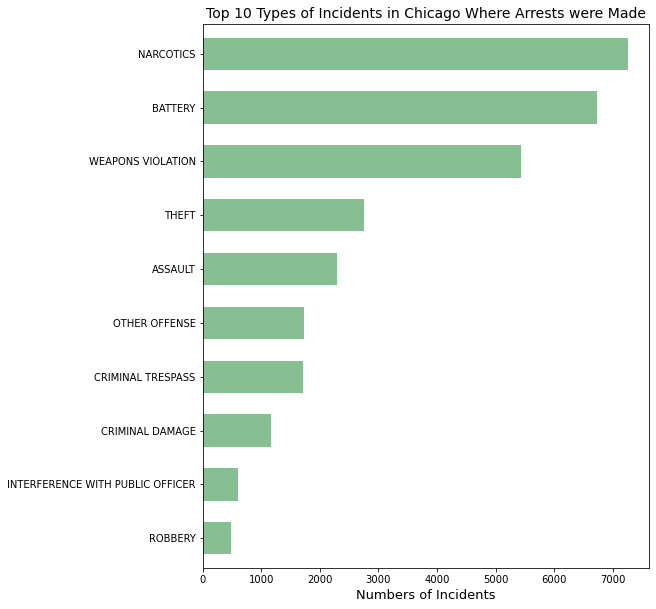

In [17]:
# Create a bar chart

ax2 = df_arrest_top10.plot(kind='barh', figsize=(8, 10), legend=None, color='#86bf91', width=0.6)

ax2.set_title('Top 10 Types of Incidents in Chicago Where Arrests were Made', fontsize=14)
ax2.set_xlabel('Numbers of Incidents', fontsize=13)
ax2.set_yticklabels(reversed(types2), fontsize=10)

plt.show()

## Incidents Where Arrests were NOT Made

In [18]:
df_noarrest = df_incidents.query('Arrest == False')
df_noarrest.reset_index(inplace=True)
df_noarrest.head()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,12016034,JD193556,1/1/2020 0:00,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,...,32.0,22.0,11,1160263.0,1912391.0,2020,3/26/2020 15:45,41.915306,-87.686639,"(41.915306069, -87.686639247)"
1,1,12220321,JD430436,1/1/2020 0:00,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,...,8.0,47.0,17,1184157.0,1844395.0,2020,12/19/2020 15:45,41.728192,-87.600985,"(41.728192429, -87.600985433)"
2,2,12013828,JD191019,1/1/2020 0:00,044XX S LAVERGNE AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,...,22.0,56.0,2,1143770.0,1874726.0,2020,3/28/2020 15:47,41.812274,-87.748177,"(41.81227369, -87.748176594)"
3,3,12019692,JD197444,1/1/2020 0:00,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,...,47.0,6.0,11,1164983.0,1921507.0,2020,4/1/2020 15:50,41.940222,-87.669039,"(41.940221932, -87.669039008)"
4,4,12036792,JD216459,1/1/2020 0:00,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,...,18.0,66.0,11,1157290.0,1856526.0,2020,4/29/2020 15:53,41.762067,-87.699077,"(41.762066981, -87.699077348)"


In [19]:
df_noarrest.shape

(174532, 23)

### Numbers of incidents

In [20]:
df_noarrest_counts = pd.DataFrame(df_noarrest['Primary Type'].value_counts())

df_noarrest_counts= df_noarrest_counts.reset_index()

df_noarrest_counts.columns = ['Types','Counts']

df_noarrest_counts

,Types,Counts
0,THEFT,37293
1,BATTERY,34656
2,CRIMINAL DAMAGE,23485
3,DECEPTIVE PRACTICE,15983
4,ASSAULT,15899
5,OTHER OFFENSE,10598
6,MOTOR VEHICLE THEFT,9472
7,BURGLARY,8246
8,ROBBERY,7376
9,WEAPONS VIOLATION,2989


### Bar chart: numbers of incidents by types

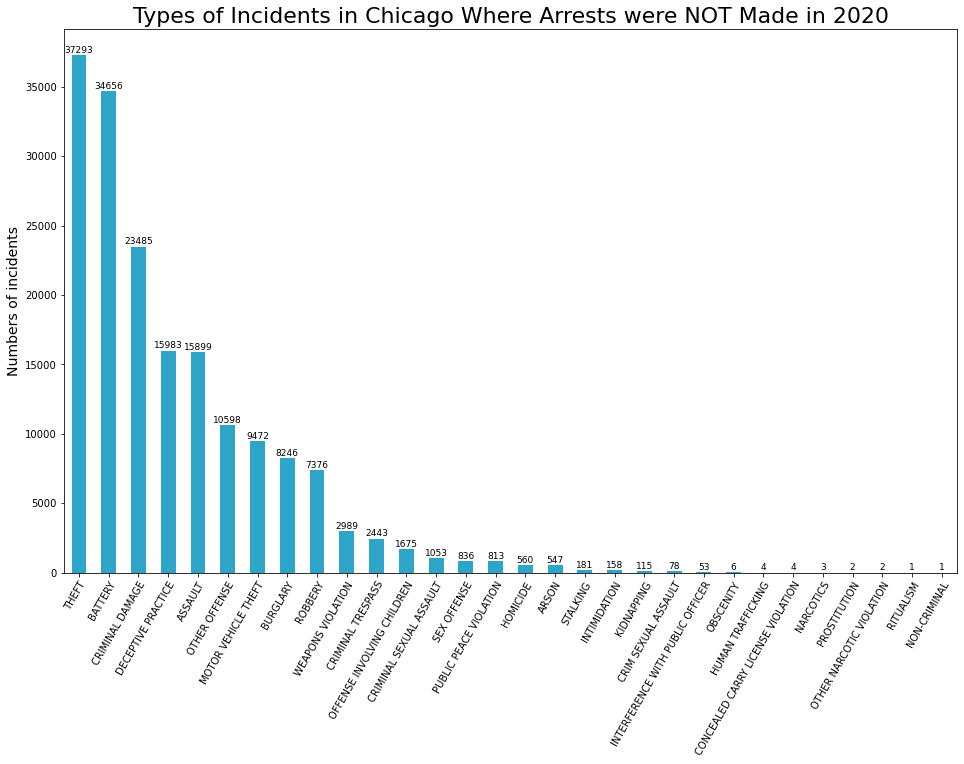

In [21]:
types3 = df_noarrest_counts['Types']

ax3 = df_noarrest_counts.plot(kind='bar', figsize=(16, 10), legend=None, color='#2ca5c9')


ax3.set_ylabel('Numbers of incidents', fontsize=14) # add y-label to the plot
ax3.set_xticklabels(types3, rotation=60, fontsize=10, ha="right", rotation_mode="anchor")
ax3.set_title('Types of Incidents in Chicago Where Arrests were NOT Made in 2020', fontsize=22) # add title to the plot


for bar in ax3.patches: 
    ax3.annotate(format(bar.get_height()),  
                   (bar.get_x() + bar.get_width()/ 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 5), 
                   textcoords='offset points') 

plt.show()

### Top 10 types of incidents

In [22]:
df_noarrest_top10 = df_noarrest_counts.head(10)

df_noarrest_top10

,Types,Counts
0,THEFT,37293
1,BATTERY,34656
2,CRIMINAL DAMAGE,23485
3,DECEPTIVE PRACTICE,15983
4,ASSAULT,15899
5,OTHER OFFENSE,10598
6,MOTOR VEHICLE THEFT,9472
7,BURGLARY,8246
8,ROBBERY,7376
9,WEAPONS VIOLATION,2989


### Bar chart: Top 10 types of incidents

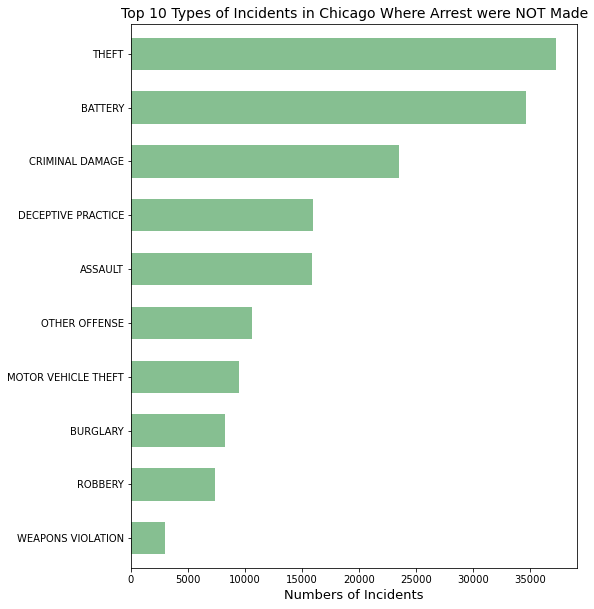

In [23]:
types4 = df_noarrest_top10['Types']


df_noarrest_top10=df_noarrest_top10.sort_values("Counts", ascending=True) 

ax4 = df_noarrest_top10.plot(kind='barh', figsize=(8, 10), legend=None, color='#86bf91', width=0.6)

ax4.set_title('Top 10 Types of Incidents in Chicago Where Arrest were NOT Made', fontsize=14)
ax4.set_xlabel('Numbers of Incidents', fontsize=13)
ax4.set_yticklabels(reversed(types4), fontsize=10)

plt.show()